In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.xception import Xception
from keras.applications.xception import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

# Re-size all the images to this

In [ ]:
IMAGE_SIZE = [299, 299]

In [ ]:
train_path = 'E:\\Project\\archive (1)\\curated_data\\dataset\\train'
valid_path = 'E:\\Project\\archive (1)\\curated_data\\dataset\\test'

#  add preprocessing layer to the front of Xception

In [ ]:
xception = Xception(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

 # don't train existing weights


In [ ]:
for layer in xception.layers:
    layer.trainable = False

# # useful for getting number of classes

In [ ]:
folders = glob('E:\\Project\\archive (1)\\curated_data\\dataset\\train\\*')

# # our layers - you can add more if you want

In [ ]:
x = Flatten()(xception.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

# # create a model object

In [ ]:
model = Model(inputs=xception.input, outputs=prediction)

# # view the structure of the model

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 149, 149, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                             

 block4_sepconv1_bn (BatchNorma  (None, 37, 37, 728)  2912       ['block4_sepconv1[0][0]']        
 lization)                                                                                        
                                                                                                  
 block4_sepconv2_act (Activatio  (None, 37, 37, 728)  0          ['block4_sepconv1_bn[0][0]']     
 n)                                                                                               
                                                                                                  
 block4_sepconv2 (SeparableConv  (None, 37, 37, 728)  536536     ['block4_sepconv2_act[0][0]']    
 2D)                                                                                              
                                                                                                  
 block4_sepconv2_bn (BatchNorma  (None, 37, 37, 728)  2912       ['block4_sepconv2[0][0]']        
 lization)

 n)                                                                                               
                                                                                                  
 block7_sepconv1 (SeparableConv  (None, 19, 19, 728)  536536     ['block7_sepconv1_act[0][0]']    
 2D)                                                                                              
                                                                                                  
 block7_sepconv1_bn (BatchNorma  (None, 19, 19, 728)  2912       ['block7_sepconv1[0][0]']        
 lization)                                                                                        
                                                                                                  
 block7_sepconv2_act (Activatio  (None, 19, 19, 728)  0          ['block7_sepconv1_bn[0][0]']     
 n)                                                                                               
          

 block9_sepconv3_bn (BatchNorma  (None, 19, 19, 728)  2912       ['block9_sepconv3[0][0]']        
 lization)                                                                                        
                                                                                                  
 add_7 (Add)                    (None, 19, 19, 728)  0           ['block9_sepconv3_bn[0][0]',     
                                                                  'add_6[0][0]']                  
                                                                                                  
 block10_sepconv1_act (Activati  (None, 19, 19, 728)  0          ['add_7[0][0]']                  
 on)                                                                                              
                                                                                                  
 block10_sepconv1 (SeparableCon  (None, 19, 19, 728)  536536     ['block10_sepconv1_act[0][0]']   
 v2D)     

                                                                                                  
 block12_sepconv3_act (Activati  (None, 19, 19, 728)  0          ['block12_sepconv2_bn[0][0]']    
 on)                                                                                              
                                                                                                  
 block12_sepconv3 (SeparableCon  (None, 19, 19, 728)  536536     ['block12_sepconv3_act[0][0]']   
 v2D)                                                                                             
                                                                                                  
 block12_sepconv3_bn (BatchNorm  (None, 19, 19, 728)  2912       ['block12_sepconv3[0][0]']       
 alization)                                                                                       
                                                                                                  
 add_10 (A

# # tell the model what cost and optimization method to use

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('E:\\Project\\archive (1)\\curated_data\\dataset\\train',
                                                 target_size = (299, 299),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 10863 images belonging to 2 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('E:\\Project\\archive (1)\\curated_data\\dataset\\test',
                                            target_size = (299, 299),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 3623 images belonging to 2 classes.


# # fit the model

In [ ]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\shubh\AppData\Local\Temp/ipykernel_10752/177326590.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/10
340/340 [==============================] - 2543s 7s/step - loss: 1.9319 - accuracy: 0.8403 - val_loss: 1.3711 - val_accuracy: 0.8670
Epoch 2/10
340/340 [==============================] - 2473s 7s/step - loss: 1.4915 - accuracy: 0.8772 - val_loss: 0.9215 - val_accuracy: 0.9051
Epoch 3/10
340/340 [==============================] - 2439s 7s/step - loss: 0.9814 - accuracy: 0.9048 - val_loss: 1.7649 - val_accuracy: 0.8786
Epoch 4/10
340/340 [==============================] - 2443s 7s/step - loss: 1.4123 - accuracy: 0.8947 - val_loss: 1.4466 - val_accuracy: 0.8799
Epoch 5/10
340/340 [==============================] - 2581s 8s/step - loss: 1.2259 - accuracy: 0.9069 - val_loss: 1.6026 - val_accuracy: 0.9108
Epoch 6/10
340/340 [==============================] - 2355s 7s/step - loss: 1.1780 - accuracy: 0.9108 - val_loss: 3.1055 - val_accuracy: 0.8518
Epoch 7/10
340/340 [==============================] - 2316s 7s/step - loss: 1.4890 - accuracy: 0.9076 - val_loss: 1.1013 - val_accuracy:

In [ ]:
import tensorflow as tf

from keras.models import load_model

model.save('Xceptionn.h5')


# # loss

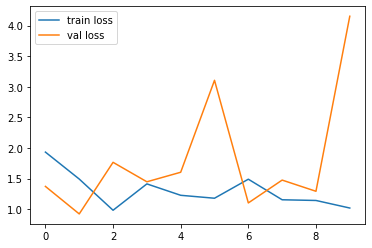

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# # accuracies

In [ ]:
plt.plot(r.history['acc'], label='train acc')
plt.plot(r.history['val_acc'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

KeyError: 'acc'